# Module 4, Session 1: Practical Exercises

**Objective:** To understand the mechanics of the sigmoid function and to implement a Logistic Regression model using Scikit-learn.


## Exercise 1: The Sigmoid Function (Conceptual)

The sigmoid function is defined as:

\[
S(z) = \frac{1}{1 + e^{-z}}
\]

Let's calculate the output of the sigmoid function for different values of \( z \) using Python.


In [22]:
import math

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + math.exp(-z))

# Given z values
z_values = [2, -1, 0, 10, -10]

# Calculate sigmoid for each z
for z in z_values:
    print(f"Sigmoid({z}) = {sigmoid(z):.5f}")


Sigmoid(2) = 0.88080
Sigmoid(-1) = 0.26894
Sigmoid(0) = 0.50000
Sigmoid(10) = 0.99995
Sigmoid(-10) = 0.00005


**Questions:**

1. Based on a decision boundary (threshold) of 0.5, which of these z values would result in a classification of `1`?  
2. Can you think of other thresholds and why you might use them?


## Exercise 2: Implement Logistic Regression (Coding)

We will build a model to predict survival on the Titanic dataset.


In [24]:
# Load dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Fill missing Age values
df['Age'] = df['Age'].fillna(df['Age'].median())

# Encode 'Sex' column
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Select relevant columns
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

# Drop rows with missing values in critical columns
df = df.dropna(subset=['Survived', 'Pclass', 'Sex', 'Age', 'Fare'])

# Define features and target
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']

# Check number of rows
print("Number of rows after preprocessing:", len(X))


Number of rows after preprocessing: 891


### Split the dataset into training and testing sets


In [25]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (712, 4)
X_test shape: (179, 4)
y_train shape: (712,)
y_test shape: (179,)


### Train the Logistic Regression Model


In [26]:
# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Make Predictions and Evaluate the Model


In [27]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy, 4))


Model Accuracy: 0.8045


## Conclusion

- The sigmoid function maps real values to probabilities between 0 and 1.  
- Logistic Regression uses the sigmoid function to predict binary outcomes.  
- The Titanic model achieves reasonable accuracy using basic features: 'Pclass', 'Sex', 'Age', and 'Fare'.  
- Filling missing values correctly and avoiding dropping all rows is critical for training.


# Module 4 – Session 2: Practical Exercises

## Objective
To calculate and interpret core classification evaluation metrics from a confusion matrix using Scikit-learn.


## Exercise 1: The Metrics Calculator (Conceptual)

A model was tested on a set of 100 patient records to predict a disease. The confusion matrix is:

|                | Predicted: No Disease | Predicted: Disease |
|----------------|--------------------|-----------------|
| Actual: No Disease | 85                 | 5               |
| Actual: Disease    | 8                  | 2               |


In [28]:
# Confusion matrix values
TN = 85
FP = 5
FN = 8
TP = 2

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy:", round(accuracy, 4))

# Precision
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
print("Precision:", round(precision, 4))

# Recall
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
print("Recall:", round(recall, 4))

# F1-score
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
print("F1-Score:", round(f1_score, 4))


Accuracy: 0.87
Precision: 0.2857
Recall: 0.2
F1-Score: 0.2353


## Exercise 2: The Scikit-learn Report Card

We will now evaluate the Logistic Regression model built in Session 1 using proper metrics.


In [30]:
# Import evaluation libraries
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
# Make predictions if not done already
predictions = model.predict(X_test)

# Print classification report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



Look at the Precision, Recall, and F1-score for class '1' (Survived).  
- Precision: How many predicted survivals were correct  
- Recall: How many actual survivals were correctly predicted  
- F1-score: Harmonic mean of precision and recall


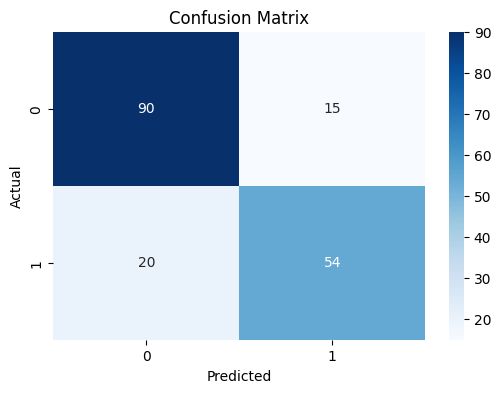

In [32]:
# Confusion matrix
cm = confusion_matrix(y_test, predictions)

# Visualize with seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### 3. ROC Curve and AUC


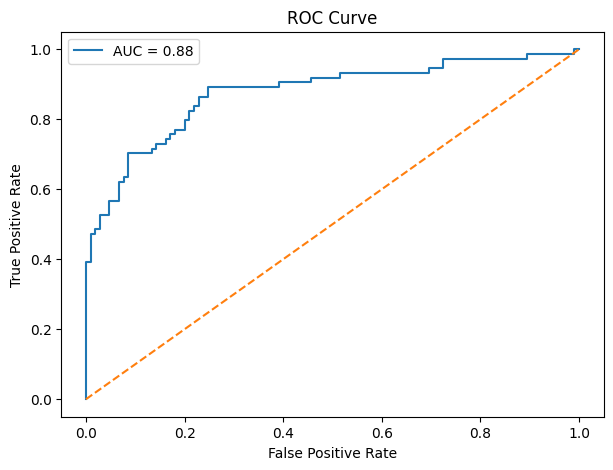

In [34]:
# Predicted probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# AUC score
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')  # random guess line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


## Exercise 3: The Strategist (Critical Thinking)

1. **Precision is more important than Recall:**  
   Example: Email spam filter. We want to avoid marking important emails as spam (false positives). High precision ensures flagged emails are truly spam.

2. **Recall is more important than Precision:**  
   Example: Disease screening test. We want to detect all sick patients (true positives). High recall ensures we miss as few sick patients as possible, even if it flags some healthy patients.
